In [ ]:
# Google Colaboratoryで作業する場合はこちらも実行してください。
from google.colab import drive
drive.mount('/content/drive')
# %cd 以降にこのnotebookを置いているディレクトリを指定してください。
%cd "/content/drive/MyDrive/Colab Notebooks/GCI winter/最終課題/実行/対アメリカ企業"

Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks/GCI winter/最終課題/実行/対アメリカ企業


In [ ]:
!pip install japanize_matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
record=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/GCI winter/最終課題/実行/data/record.csv")
client=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/GCI winter/最終課題/実行/data/client.csv')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 23.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize_matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120275 sha256=ed53db80e0aaf5a52b10fa035bd9cb520fdf93ab7bad92f4c2e13366c2067e6f
  Stored in directory: /root/.cache/pip/wheels/4f/ca/96/4cc5e192421cceb077fbf4ffec533382edd416fd3fa0af0bbd
Successfully built japanize_matplotlib


In [ ]:
record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 50 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   rev_Mean         99643 non-null   float64
 1   mou_Mean         99643 non-null   float64
 2   totmrc_Mean      99643 non-null   float64
 3   da_Mean          99643 non-null   float64
 4   ovrmou_Mean      99643 non-null   float64
 5   ovrrev_Mean      99643 non-null   float64
 6   vceovr_Mean      99643 non-null   float64
 7   datovr_Mean      99643 non-null   float64
 8   roam_Mean        99643 non-null   float64
 9   change_mou       99109 non-null   float64
 10  change_rev       99109 non-null   float64
 11  drop_vce_Mean    100000 non-null  float64
 12  drop_dat_Mean    100000 non-null  float64
 13  blck_vce_Mean    100000 non-null  float64
 14  blck_dat_Mean    100000 non-null  float64
 15  unan_vce_Mean    100000 non-null  float64
 16  unan_dat_Mean    100000 non-null  float

In [ ]:
null_list=[]
for col in record.columns:
  if record[col].isnull().sum()!=0:
    null_list.append(col)
record=record.dropna(subset=null_list)

In [ ]:
record.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99109 entries, 0 to 99993
Data columns (total 50 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rev_Mean         99109 non-null  float64
 1   mou_Mean         99109 non-null  float64
 2   totmrc_Mean      99109 non-null  float64
 3   da_Mean          99109 non-null  float64
 4   ovrmou_Mean      99109 non-null  float64
 5   ovrrev_Mean      99109 non-null  float64
 6   vceovr_Mean      99109 non-null  float64
 7   datovr_Mean      99109 non-null  float64
 8   roam_Mean        99109 non-null  float64
 9   change_mou       99109 non-null  float64
 10  change_rev       99109 non-null  float64
 11  drop_vce_Mean    99109 non-null  float64
 12  drop_dat_Mean    99109 non-null  float64
 13  blck_vce_Mean    99109 non-null  float64
 14  blck_dat_Mean    99109 non-null  float64
 15  unan_vce_Mean    99109 non-null  float64
 16  unan_dat_Mean    99109 non-null  float64
 17  plcd_vce_Mea

In [ ]:
#自作特徴量
record['Mean_number_of_disabled_voice_call']=record['drop_vce_Mean']+record['blck_vce_Mean']
record['Mean_number_of_disabled_data_call']=record['drop_dat_Mean']+record['blck_dat_Mean']
record['recurring_ratio_of_all_revenue']=record['rev_Mean']/record['totmrc_Mean']
record['over_use_minutes_ratio_of_all_use_minutes']=record['mou_Mean']/record['ovrmou_Mean']
record['voice_over_use_ratio_of_total_revenue']=record['rev_Mean']/record['vceovr_Mean']
record['total_revenue']=record['rev_Mean']*record['months']
record['total_minutues']=record['mou_Mean']*record['months']
record['total_mean_number_of_disabled_call']=record['Mean_number_of_disabled_voice_call']+record['Mean_number_of_disabled_data_call']
record['disabled_call_ratio_of_overall_monthly_call']=record['total_mean_number_of_disabled_call']/record['mou_Mean']
record['total_number_of_attempted_call_answered']=record['plcd_vce_Mean']+record['plcd_dat_Mean']
record['attempted_call_ratio_of_all_call']=record['total_number_of_attempted_call_answered']/record['mou_Mean']
record['received_call_ratio_of_all_call']=record['recv_vce_Mean']/record['mou_Mean']#次
record['total_number_of_attempted_call_unanswered']=record['unan_vce_Mean']+record['unan_dat_Mean']
record['total_number_of_attempted_call']=record['total_number_of_attempted_call_answered']+record['total_number_of_attempted_call_unanswered']
record['overuse_data_ratio_of_all_revenue']=record['datovr_Mean']/record['rev_Mean']
record['overuse_all_data_ratio_of_all_revenue']=record['ovrrev_Mean']/record['rev_Mean']#次これ
record['roaming_call_ratio_of_all_call']=record['roam_Mean']/record['mou_Mean']#次これ
record.loc[record['rev_Mean']<50,'rev_Mean_category']=1
record.loc[(50<=record['rev_Mean']) & (record['rev_Mean']<100),'rev_Mean_category']=2
record.loc[(100<=record['rev_Mean']) & (record['rev_Mean']<150),'rev_Mean_category']=3
record.loc[(150<=record['rev_Mean']) & (record['rev_Mean']<200),'rev_Mean_category']=4

In [ ]:
record.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99109 entries, 0 to 99993
Data columns (total 68 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   rev_Mean                                     99109 non-null  float64
 1   mou_Mean                                     99109 non-null  float64
 2   totmrc_Mean                                  99109 non-null  float64
 3   da_Mean                                      99109 non-null  float64
 4   ovrmou_Mean                                  99109 non-null  float64
 5   ovrrev_Mean                                  99109 non-null  float64
 6   vceovr_Mean                                  99109 non-null  float64
 7   datovr_Mean                                  99109 non-null  float64
 8   roam_Mean                                    99109 non-null  float64
 9   change_mou                                   99109 non-null  float64
 10

In [ ]:
record['rev_Mean_category']

0        1.0
1        2.0
2        1.0
3        1.0
4        2.0
        ... 
99981    1.0
99984    2.0
99985    2.0
99986    3.0
99993    2.0
Name: rev_Mean_category, Length: 99109, dtype: float64

In [ ]:
from lightgbm import LGBMClassifier#基幹モデルはlightgbm
from sklearn.metrics import roc_auc_score,f1_score#評価指標は一旦aucとf1scoreで仮定。
corr_df=record.corr()
corr_df2=pd.DataFrame(corr_df['churn']).T
features_list=[]
for col in corr_df2.columns:
  if np.abs(corr_df2[col][0])>0.003:
    features_list.append(col)
  else:
    pass  
len(features_list)    

65

## lightgbmで実行

In [ ]:
AUC train score is 0.6799722450308592
AUC valid score is 0.654907899926993
f1 train score is 0.623619174472644
f1 valid score is 0.6038412118752959

SyntaxError: ignored

In [ ]:
#aucで検証※最良モデル
from lightgbm import LGBMClassifier#基幹モデルはlightgbm
from sklearn.model_selection import train_test_split,cross_val_score,StratifiedKFold
cv=StratifiedKFold(n_splits=5)
X_auc=record.drop(['churn','over_use_minutes_ratio_of_all_use_minutes','voice_over_use_ratio_of_total_revenue','total_revenue','attempted_call_ratio_of_all_call','total_number_of_attempted_call','overuse_data_ratio_of_all_revenue','roaming_call_ratio_of_all_call'],axis=1)
y=record['churn']
X_train,X_valid,y_train,y_valid=train_test_split(X_auc,y,test_size=0.3,random_state=42)
model_lgb_auc=LGBMClassifier(learning_rate=0.0295,importance_type='gain')
model_lgb_auc.fit(X_train,y_train)
lgb_score=cross_val_score(model_lgb_auc,X_auc,y,scoring='roc_auc',cv=cv)
train_predict_proba=model_lgb_auc.predict_proba(X_train)[:,1]
valid_predict_proba=model_lgb_auc.predict_proba(X_valid)[:,1]
train_predict=model_lgb_auc.predict(X_train)
valid_predict=model_lgb_auc.predict(X_valid)
print(f'AUC CV score is {np.mean(lgb_score)}')#CV scoreを精度指標として採用
print(f'AUC train score is {roc_auc_score(y_train,train_predict_proba)}')
print(f'AUC valid score is {roc_auc_score(y_valid,valid_predict_proba)}')
print(f'f1 train score is {f1_score(y_train,train_predict)}')#参考程度
print(f'f1 valid score is {f1_score(y_valid,valid_predict)}')#参考程度
print(lgb_score)

AUC CV score is 0.6216722832630939
AUC train score is 0.6799722450308592
AUC valid score is 0.654907899926993
f1 train score is 0.623619174472644
f1 valid score is 0.6038412118752959
[0.61933196 0.61000212 0.58458802 0.63501636 0.65942297]


In [ ]:
record.disabled_call_ratio_of_overall_monthly_call=record.disabled_call_ratio_of_overall_monthly_call.replace(np.inf,np.nan)
record.disabled_call_ratio_of_overall_monthly_call.value_counts()

0.000000    10042
0.024691       22
0.022857       22
0.036697       21
0.027211       21
            ...  
0.006974        1
0.001954        1
0.032596        1
0.004781        1
0.009933        1
Name: disabled_call_ratio_of_overall_monthly_call, Length: 67176, dtype: int64

In [ ]:
record[record['disabled_call_ratio_of_overall_monthly_call']!=0]['churn'].value_counts()

0    45354
1    43713
Name: churn, dtype: int64

In [ ]:
record[record['disabled_call_ratio_of_overall_monthly_call']==0]['churn'].value_counts()

1    5171
0    4871
Name: churn, dtype: int64

In [ ]:
r

In [ ]:
y_valid

37168    1
55323    1
51401    0
67814    1
29672    1
        ..
27173    1
62904    0
28061    0
44723    1
39406    0
Name: churn, Length: 29733, dtype: int64

In [ ]:
def f1_opt(x):
    return -f1_score(y_train.values, train_predict >= x)
from scipy.optimize import minimize

result = minimize(f1_opt, x0=np.array([0.8]), method='Nelder-Mead')
print(result)
   

 final_simplex: (array([[0.8       ],
       [0.80007812]]), array([-0.62361917, -0.62361917]))
           fun: -0.623619174472644
       message: 'Optimization terminated successfully.'
          nfev: 29
           nit: 10
        status: 0
       success: True
             x: array([0.8])


In [ ]:
f1_score(y_train.values,train_predict>0.5)

0.623619174472644

In [ ]:
f1_score(y_train.values,train_predict>0.8)

0.623619174472644

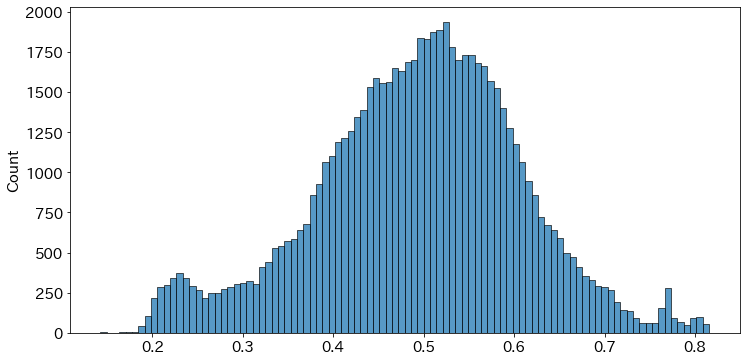

In [ ]:
import seaborn as sns
plt.figure(figsize=(12,6))
plt.rcParams['font.size']=15
sns.histplot(train_predict_proba)
plt.savefig('リスクスコア分布イメージ図.png')

In [ ]:
predict_summary=pd.DataFrame(columns=['顧客No.','解約確率'])
predict_summary['顧客No.']=X_train.index
predict_summary['解約確率']=train_predict_proba
predict_summary.set_index(['顧客No.'],inplace=True)
predict_summary['契約月数']=X_train['months']
predict_summary['解約の有無']=y_train

In [ ]:
predict_summary[predict_summary['解約確率']>=0.8]['解約の有無'].value_counts()

1    173
0     10
Name: 解約の有無, dtype: int64

In [ ]:
173/183

0.9453551912568307

In [ ]:
predict_summary[predict_summary['解約確率']<0.2]['解約の有無'].value_counts()

0    175
1     13
Name: 解約の有無, dtype: int64

In [ ]:
predict_summary[(predict_summary['解約確率']>=0.2) & (predict_summary['解約確率']<0.5)]['解約の有無'].value_counts()

0    21667
1    12686
Name: 解約の有無, dtype: int64

In [ ]:
predict_summary[(predict_summary['解約確率']>=0.5) & (predict_summary['解約確率']<0.8)]['解約の有無'].value_counts()

1    21364
0    13288
Name: 解約の有無, dtype: int64

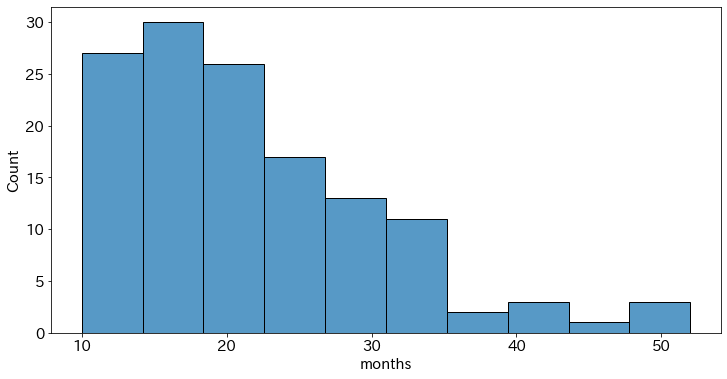

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(predict_summary[predict_summary['解約確率']>0.8]['months'])
plt.savefig('予測解約確率80%以上の継続契約月数.png')
plt.show()

In [ ]:
pip install shap


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 15.5 MB/s eta 0:00:00


In [ ]:
import shap
# jupyter notebookにコードを表示させるためにjsをロード
fig = plt.gcf()
explainer = shap.TreeExplainer(model=model_lgb_auc,  feature_perturbation='tree_path_dependent', model_output='margin')
shap_values = explainer.shap_values(X=X_auc)

model_output = "margin" has been renamed to model_output = "raw"
LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


[array([[-4.31378952e-03, -6.16734419e-02, -4.98079772e-03, ...,
         -4.34602008e-04,  2.22976381e-02, -3.06328740e-05],
        [-2.65127545e-03,  2.02224237e-03,  5.66403242e-02, ...,
          6.77597990e-04,  6.45492084e-03, -1.76917658e-05],
        [ 3.06504518e-02, -9.32437150e-02,  2.57113480e-02, ...,
         -1.50752218e-04,  1.24283304e-02, -3.06328740e-05],
        ...,
        [-5.72598508e-03,  1.89650563e-02,  6.56489922e-02, ...,
         -4.34602008e-04,  6.30570376e-02, -3.06328740e-05],
        [-1.04442593e-02,  1.05431123e-02, -8.29262432e-02, ...,
         -2.35035649e-04, -7.40272936e-02, -1.11546239e-05],
        [-6.29599567e-03,  2.26693747e-02,  1.18278181e-01, ...,
         -4.34602008e-04,  2.78580920e-02, -1.75191420e-05]]),
 array([[ 4.31378952e-03,  6.16734419e-02,  4.98079772e-03, ...,
          4.34602008e-04, -2.22976381e-02,  3.06328740e-05],
        [ 2.65127545e-03, -2.02224237e-03, -5.66403242e-02, ...,
         -6.77597990e-04, -6.45492084e

<Figure size 432x288 with 0 Axes>

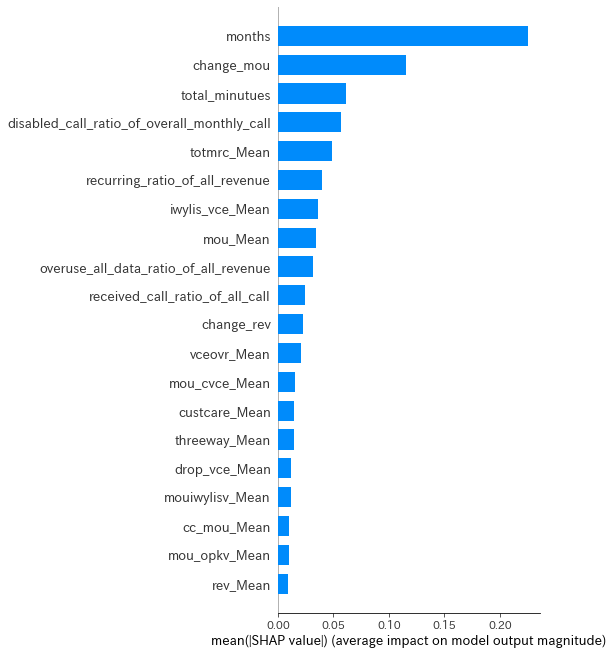

In [ ]:
fig = plt.gcf()
shap.summary_plot(shap_values[0], X_auc, plot_type="bar")
fig.savefig('Lightgbmの特徴量寄与度(SHARP)')
plt.close()

In [ ]:
summary=pd.DataFrame()
summary['features']=record.drop(['churn','over_use_minutes_ratio_of_all_use_minutes','voice_over_use_ratio_of_total_revenue','total_revenue','attempted_call_ratio_of_all_call','total_number_of_attempted_call','overuse_data_ratio_of_all_revenue','roaming_call_ratio_of_all_call'],axis=1).columns
summary['importances']=model_lgb_auc.feature_importances_
summary_sorted=summary.sort_values(by='importances',ascending=True).tail(30)

In [ ]:
summary_sorted

,features,importances
24,ccrndmou_Mean,325.977698
5,ovrrev_Mean,350.153402
21,comp_vce_Mean,356.739301
19,recv_vce_Mean,387.104203
47,callwait_Mean,435.864100
27,threeway_Mean,592.953294
39,opk_vce_Mean,648.027098
11,drop_vce_Mean,715.481898
4,ovrmou_Mean,775.246299
41,mou_opkv_Mean,795.956694


<BarContainer object of 30 artists>

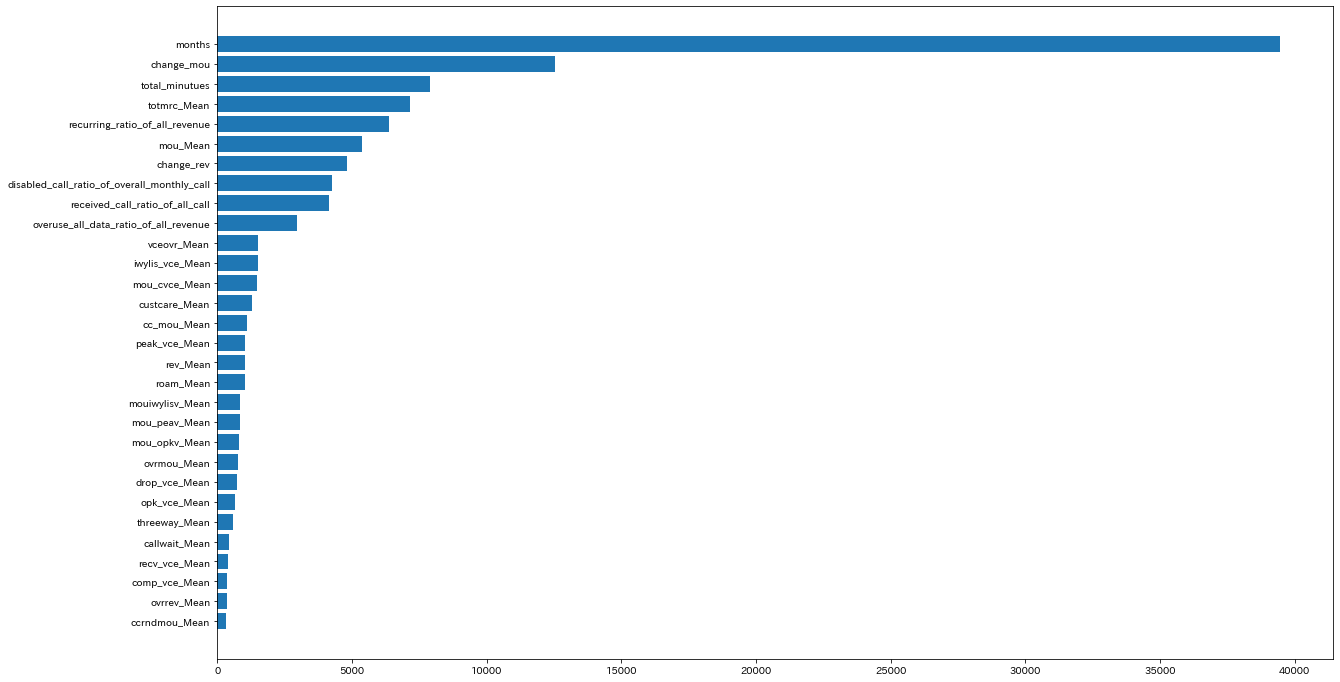

In [ ]:
plt.figure(figsize=(20,12))
plt.barh(summary_sorted['features'],summary_sorted['importances'])

## こっからxgboost

In [ ]:
AUC train score is 0.6684297709766811
AUC valid score is 0.6517046200241232
f1 train score is 0.6195205971006171
f1 valid score is 0.6052331432405234

SyntaxError: ignored

In [ ]:
#aucで検証#最良モデル
import xgboost as xgb
from sklearn.model_selection import train_test_split,cross_val_score,StratifiedKFold
cv=StratifiedKFold(n_splits=5)
X_auc=record[features_list].drop(['churn','Mean_number_of_disabled_voice_call','voice_over_use_ratio_of_total_revenue','total_revenue','disabled_call_ratio_of_overall_monthly_call','total_number_of_attempted_call_unanswered','total_number_of_attempted_call','overuse_data_ratio_of_all_revenue','overuse_all_data_ratio_of_all_revenue','roaming_call_ratio_of_all_call','rev_Mean_category'],axis=1)
y=record['churn']
X_train,X_valid,y_train,y_valid=train_test_split(X_auc,y,test_size=0.3,random_state=42)
model_xgb_auc=xgb.XGBClassifier(importance_type='total_gain')
model_xgb_auc.fit(X_train,y_train)
xgb_score=cross_val_score(model_xgb_auc,X_auc,y,scoring='roc_auc',cv=cv)
train_predict_proba=model_xgb_auc.predict_proba(X_train)[:,1]
valid_predict_proba=model_xgb_auc.predict_proba(X_valid)[:,1]
train_predict=model_xgb_auc.predict(X_train)
valid_predict=model_xgb_auc.predict(X_valid)
print(f'AUC CV score is {np.mean(xgb_score)}')#CV scoreを精度指標として採用
print(f'AUC train score is {roc_auc_score(y_train,train_predict_proba)}')
print(f'AUC valid score is {roc_auc_score(y_valid,valid_predict_proba)}')
print(f'f1 train score is {f1_score(y_train,train_predict)}')
print(f'f1 valid score is {f1_score(y_valid,valid_predict)}')
print(xgb_score)

AUC CV score is 0.6239284904648698
AUC train score is 0.6684297709766811
AUC valid score is 0.6517046200241232
f1 train score is 0.6195205971006171
f1 valid score is 0.6052331432405234
[0.61361225 0.60611137 0.58733759 0.64463148 0.66794975]


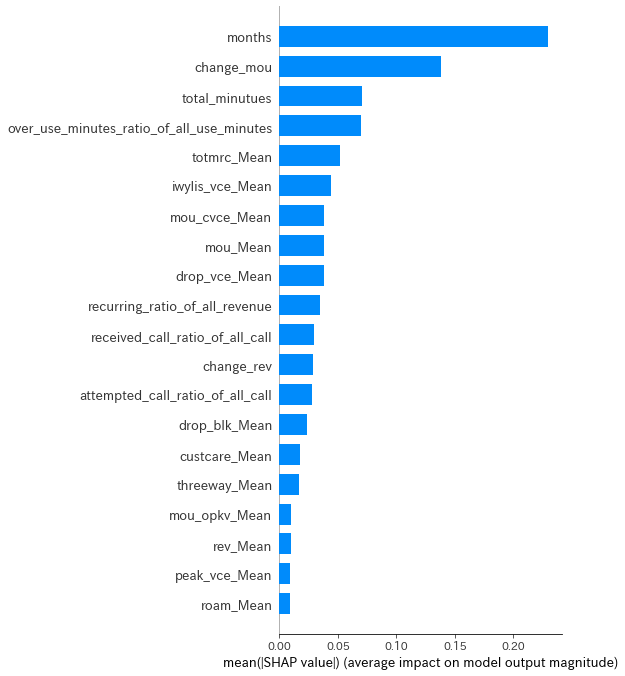

In [ ]:
import shap
# jupyter notebookにコードを表示させるためにjsをロード
fig = plt.gcf()
explainer = shap.TreeExplainer(model=model_xgb_auc,  feature_perturbation='tree_path_dependent', model_output='margin')
shap_values = explainer.shap_values(X=X_auc)
shap.summary_plot(shap_values, X_auc, plot_type="bar")
fig.savefig('Xgboostの特徴量寄与度(SHARP).png')
plt.close()

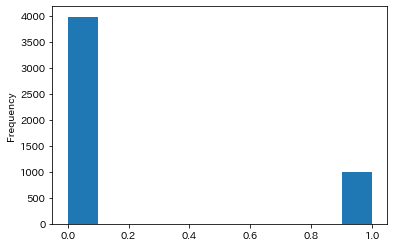

In [ ]:
xgb_churn_dashboard=pd.DataFrame(columns=['churn','predicted_churn_probability'])
xgb_churn_dashboard['churn']=y_train.values
xgb_churn_dashboard['predicted_churn_probability']=train_predict_proba
xgb_churn_dashboard[xgb_churn_dashboard['predicted_churn_probability']<=0.3]['churn'].plot.hist()

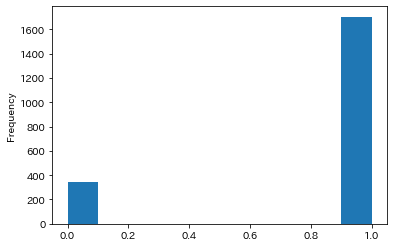

In [ ]:
xgb_churn_dashboard[xgb_churn_dashboard['predicted_churn_probability']>0.7]['churn'].plot.hist()

(array([1077., 1451., 2418., 5216., 8310., 7100., 2871.,  836.,  354.,
         100.]),
 array([0.1711992 , 0.24354123, 0.31588325, 0.3882253 , 0.4605673 ,
        0.53290933, 0.6052514 , 0.6775934 , 0.7499354 , 0.8222774 ,
        0.89461946], dtype=float32),
 <a list of 10 Patch objects>)

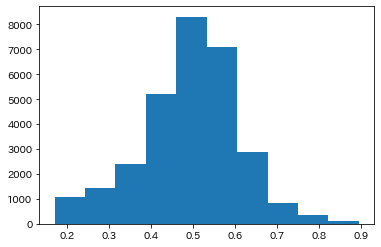

In [ ]:
plt.hist(valid_predict_proba)

In [ ]:
summary=pd.DataFrame()
summary['features']=record[features_list].drop(['churn','Mean_number_of_disabled_voice_call','voice_over_use_ratio_of_total_revenue','total_revenue','disabled_call_ratio_of_overall_monthly_call','total_number_of_attempted_call_unanswered','total_number_of_attempted_call','overuse_data_ratio_of_all_revenue','overuse_all_data_ratio_of_all_revenue','roaming_call_ratio_of_all_call','rev_Mean_category'],axis=1).columns
summary['importances']=model_xgb_auc.feature_importances_
summary_sorted=summary.sort_values(by='importances',ascending=True).tail(30)

<BarContainer object of 30 artists>

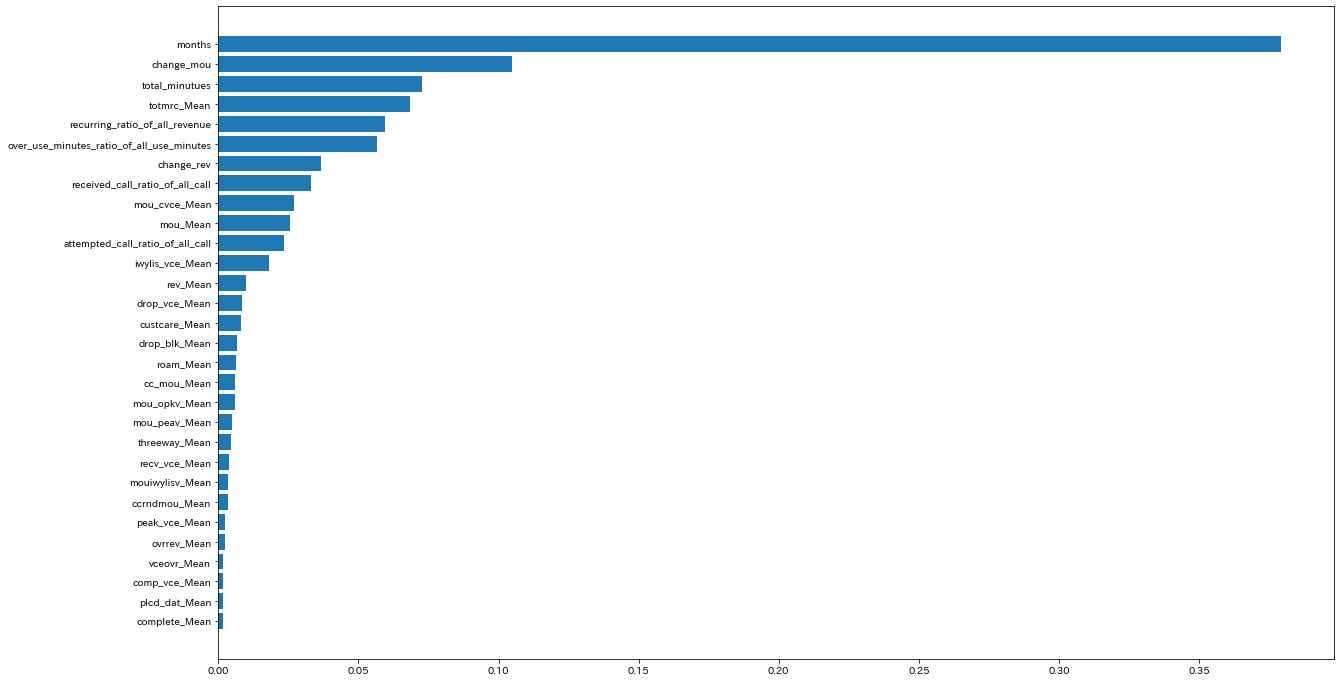

In [ ]:
plt.figure(figsize=(20,12))
plt.barh(summary_sorted['features'],summary_sorted['importances'])